[![Open in COlab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1w0la4sy3fByhBEiYewQqURTRNKBWI5-f#scrollTo=6nPX0Etiwz5w)

# Prediction of Product Sales

Jamison Hunter

# Overview

The purpose of this notebook is to analyze outlet product sales in order to utilize a machine learning algorithm to predict future sales. Along the way, I will go through the process of cleaning the data, exploring the data, and pointing out any relevant observations I may come across.

# Data Dictionary

Variables and Descriptions
* Item_Identifier	- Unique product ID
* Item_Weight	- Weight of product
* Item_Fat_Content - Whether the product is low fat or regular
* Item_Visibility	- The percentage of total display area of all products in a store allocated to the particular product
* Item_Type	- The category to which the product belongs
* Item_MRP - Maximum Retail Price (list price) of the product
* Outlet_Identifier	- Unique store ID
* Outlet_Establishment_Year	- The year in which store was established
* Outlet_Size	- The size of the store in terms of ground area covered
* Outlet_Location_Type	- The type of area in which the store is located
* Outlet_Type	- Whether the outlet is a grocery store or some sort of supermarket
* Item_Outlet_Sales	- Sales of the product in the particular store. This is the target variable to be predicted.

# Load and Inspect Data

# Loading Libraries and Data

In [1]:
# loading in the necessary imports for data analysis and cleaning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# data processing importsfrom
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
# imports necessary for predictive models
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
# setting random state for reproducibility
SEED = 321
np.random.seed(SEED)

# Inspecting Data

In [2]:
# saving the local path for sales_predictions.csv as a variable
sales_file = "sales_predictions.csv"

In [3]:
# turning the sales_file variable into a data frame
df = pd.read_csv(sales_file)
# creating a copy for a future portion of the project
df2 = df.copy()
# printing data frame information along with the first 5 rows of the data frame
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Cleaning

In order to present consistent charts throughout, I will begin by setting up the default graph style for this data analysis.

In [4]:
# setting the style for seaborn graphs
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

In [5]:
# stating the number of rows and columns in the data set
print(f"This data set has {df.shape[0]} rows and {df.shape[1]} columns.")

This data set has 8523 rows and 12 columns.


In [6]:
# checking data types in the data set
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# checking for duplicate rows
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


# Addressing Missing Values



In [8]:
# stating the total number of missing values in the data set
print(f"There are {df.isna().sum().sum()} missing values.")

There are 3873 missing values.


In [9]:
# checking for missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# displaying the percentage of missing data by column
print(df.isna().sum()/len(df)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


Numerous values seem to be missing from both Item_Weight and Outlet_Size.



*   Item_Weight is missing 17.165%.
*   Outlet_Size is missing 28.276%.

These missing values should show up as "NaN" values, which will need to be replaced.



In [11]:
# inspecting the first 5 rows of missing data in Item_Weight
df[df["Item_Weight"].isna()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [12]:
# inspecting the first 5 rows of missing data in Outlet_Size
df[df["Outlet_Size"].isna()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


Since the amount of values missing from both Item_Weight and Outlet_Size is less than 50% and greater than 5%, I will choose to replace any "NaN" values with "Unknown" in the Outlet_Size column. In order to better decide what should be done concerning Item_Weight, I will create a histogram in order to gather if I should use mean or median as the replacement value.

Text(0.5, 1.0, 'Item Weight Distribution')

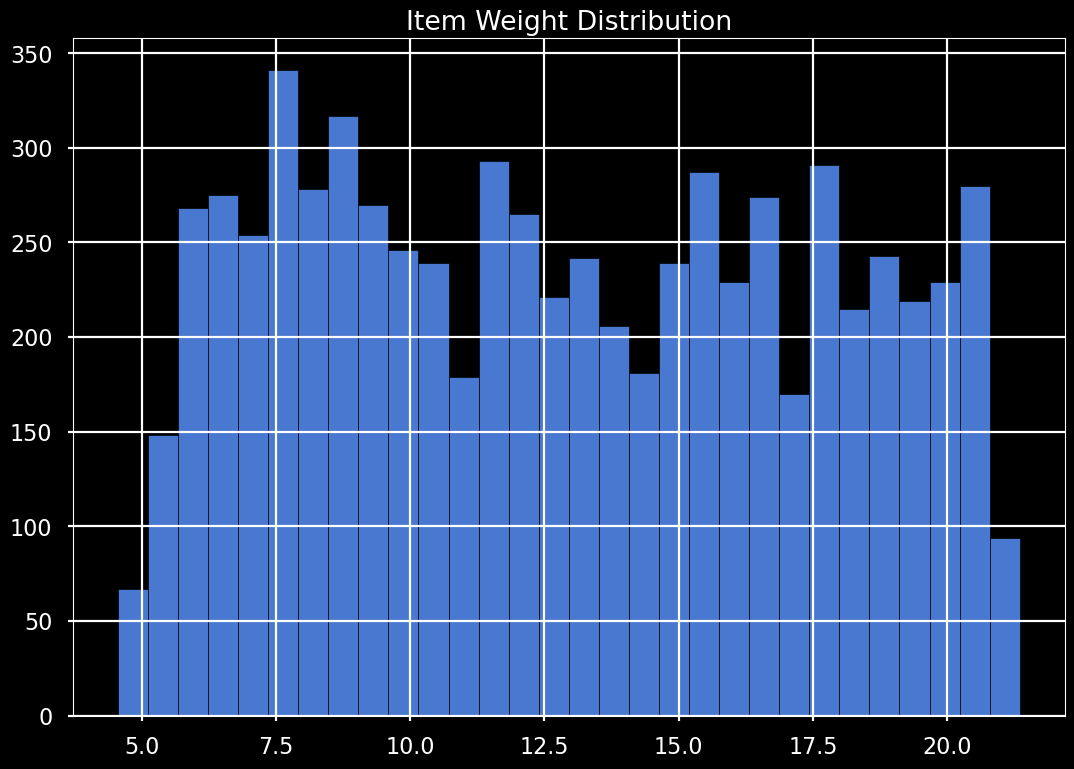

In [13]:
ax = df["Item_Weight"].hist(bins = 30, edgecolor = "black")
ax.set_title("Item Weight Distribution")

Based on the results of this histogram, I believe it would be best to replace any unknows in Item_Weight with the mean value. This is because the distribution of Item_Weight doesn't skew too far to the left or right.

In [14]:
i_mean = np.mean(df["Item_Weight"])
# replacing missing values with Item_Weight average
df['Item_Weight'].fillna(value = i_mean, inplace = True)
# filling in missing data in the Outlet_Size solumn
df['Outlet_Size'].fillna(value = "Unknown", inplace = True)
# double checking to see if the missing data has been filled in Outlet_Size
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

The data set no longer has any missing values.


# Addressing Inconsistent Values

I am going to check every column taking object class data in order to make sure the values are consistent.

In [15]:
# checking each object column's unique entries
# adding spacing for ease of reading
print(df["Item_Fat_Content"].unique())
print()
print(df["Item_Type"].unique())
print()
print(df["Outlet_Location_Type"].unique())
print()
print(df["Outlet_Type"].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

['Tier 1' 'Tier 3' 'Tier 2']

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


There appears to be several inconsistencies in the Item_Fat_Content column. I will address this by changing "LF" and "low fat" into "Low Fat." I will also change any "reg" values into "Regular."

In [16]:
# replacing LF with Low Fat
df = df.replace(to_replace="LF",
           value="Low Fat")
# replacing low fat with Low Fat
df = df.replace(to_replace="low fat",
           value="Low Fat")
# replacing reg with Regular
df = df.replace(to_replace="reg",
           value="Regular")
# checking to make sure the values of Item_Fat_Content are correct
print(df["Item_Fat_Content"].unique())

['Low Fat' 'Regular']


# Numerical Column Statistics

In this section, there will be listed the necessary statistics for numerical columns in order to find the mean, median, and mode, of each column.

In [17]:
# stating the statistics for each numerical column
df.describe(include = "number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Text(0.5, 1.0, 'Numerical Column Deviation')

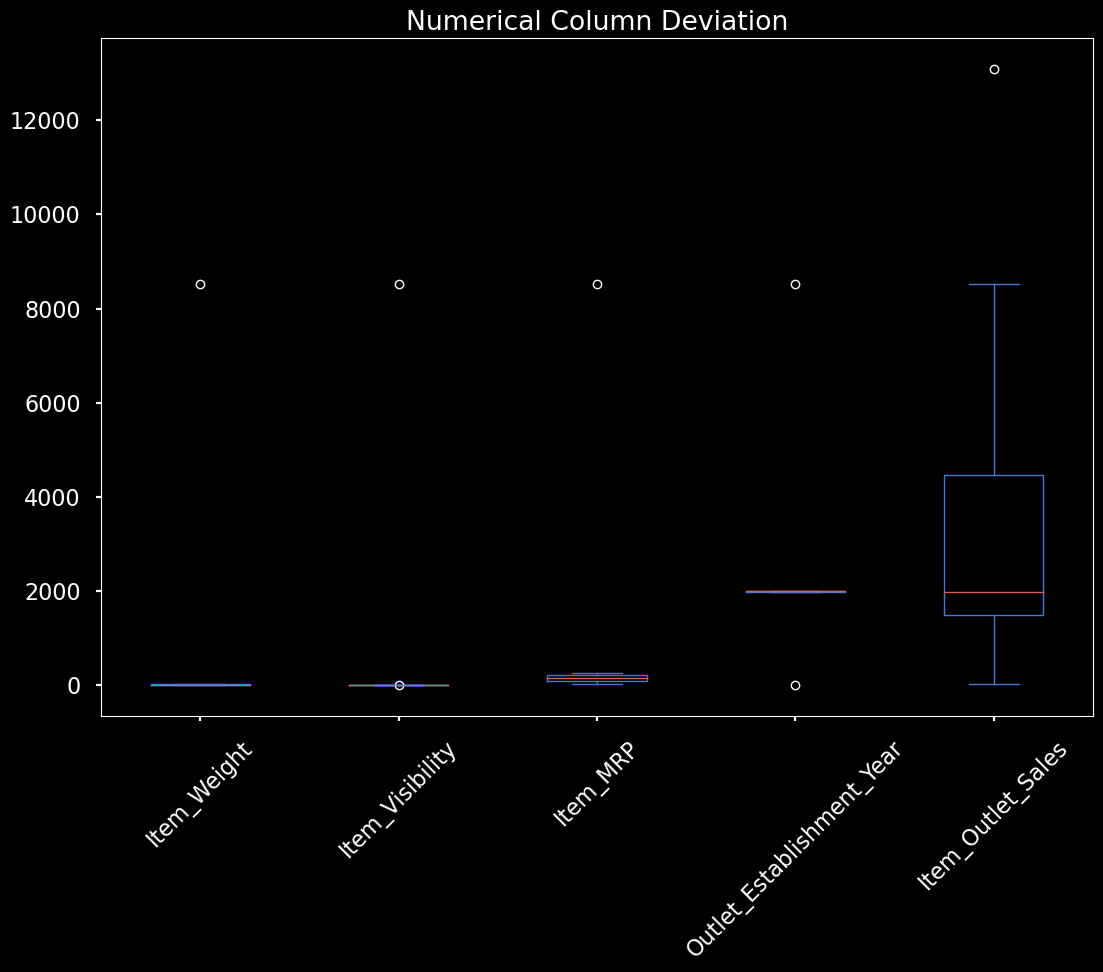

In [18]:
# setting the numerical column statistics equal to a variable
ndata = df.describe(include = "number")
# generating numerical column statistics as a bar graph
ax = ndata.plot(kind = "box")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
# setting the graph title
ax.set_title("Numerical Column Deviation")

Based on the above graph, it can be seen that Item_Outlet_Sales can vary quite wildly at its minimum and maximum points. This will be useful information as analysis continues.

# Exploratory Data Analysis

In this next portion, the data set will be analyzed graphically in order to search for possible correlations.

In [19]:
# checking for correlations numerically
corr = df.corr()
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


Text(0.5, 1.0, 'Numerical Data Correlations')

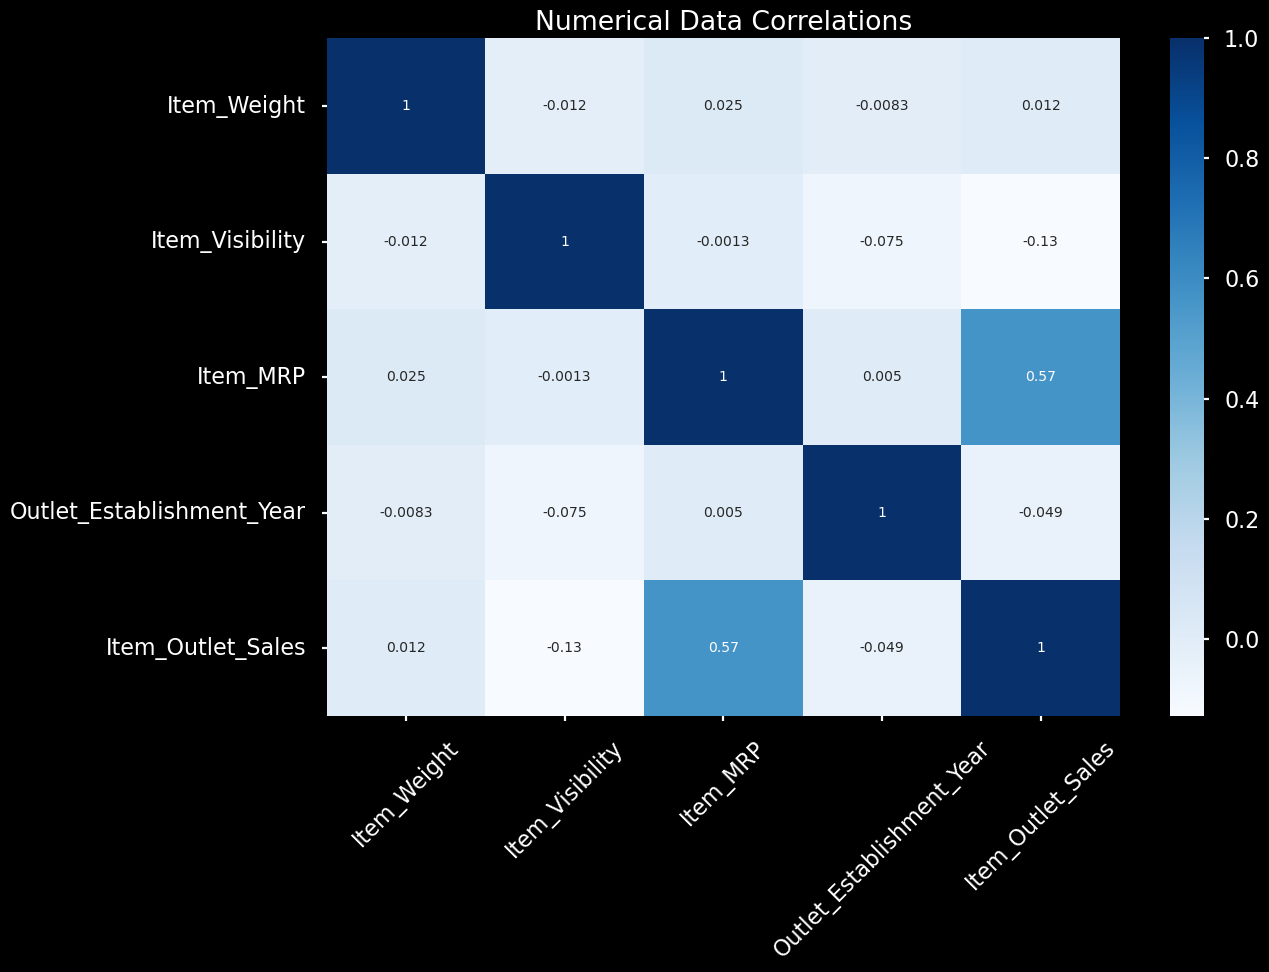

In [20]:
# generating a heatmap of all numerical column data correlations
ax = sns.heatmap(corr, cmap = "Blues", annot = True)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_title("Numerical Data Correlations")

There seems to be a moderate correlation between Item_MRP and Outlet_Sales. There even seems to be an ever so slight negative correlation between Item_Visibility and Item_Outlet_Sales, which I find somewhat surprising upon first glance. Though, this could be due to larger items having greater prices and more inconvenience involved in moving large items. However, this is purely speculation. The negative correlation is already so small that it can hardly be considered meaningful.

Next, I will take a look at some of the object data columns in order to check for any patterns, which can be analyzed further during the exploratory data analysis.

In [21]:
# checking object data type columns in order to see what should be inspected
df.describe(include = "object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


Text(0.5, 1.0, 'Item Fat Content')

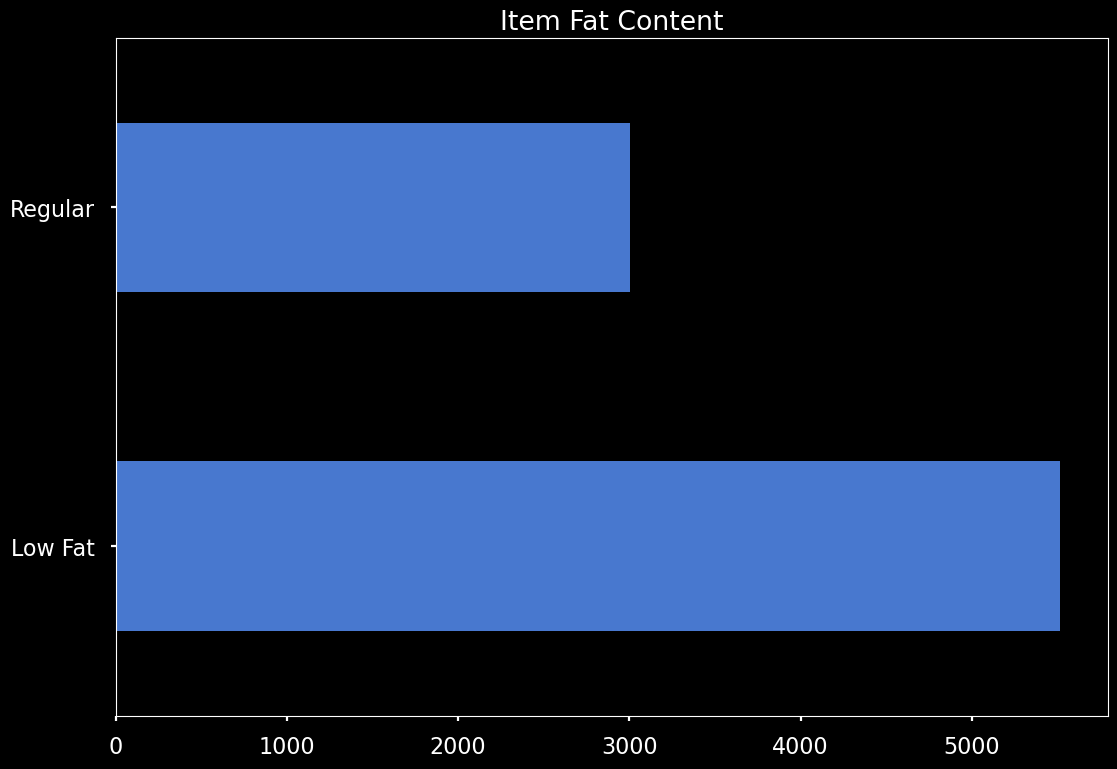

In [22]:
# generating bar graph of Item_Fat_Content value counts
ax = df["Item_Fat_Content"].value_counts().plot(kind = "barh")
ax.set_title("Item Fat Content")

The majority of items are low fat.

Text(0.5, 1.0, 'Item Type')

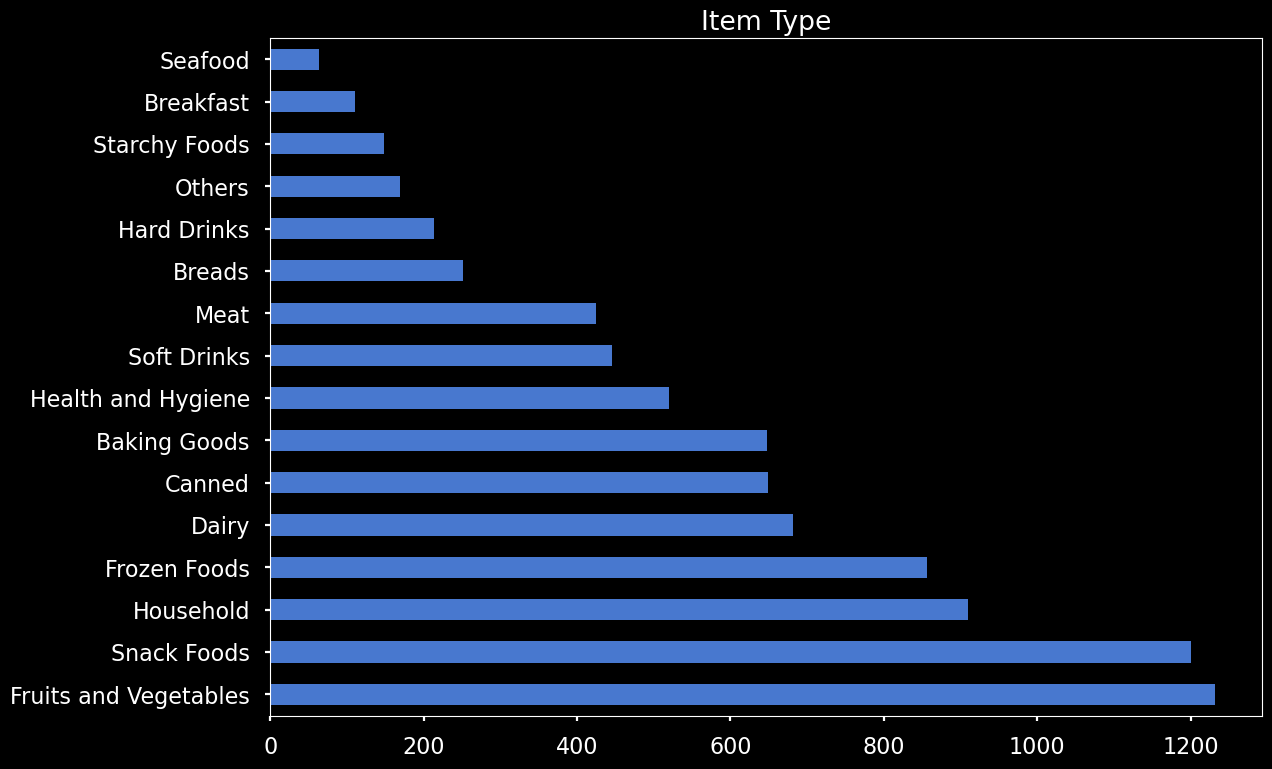

In [23]:
# generating bar graph of Item_Type
ax = df["Item_Type"].value_counts().plot(kind = "barh")
ax.set_title("Item Type")

Fruits and Vegetables represent the largest category while Seafood represents the smallest category.

Text(0.5, 1.0, 'Outlet Location Type')

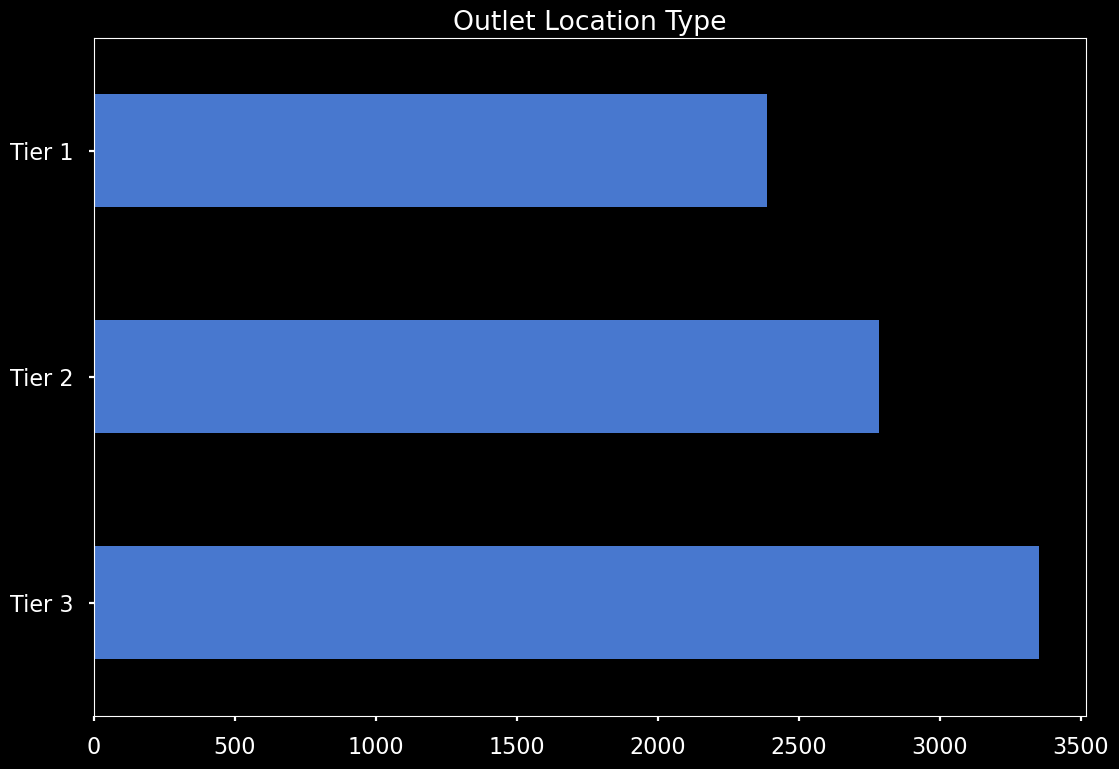

In [24]:
# generating a bar graph of outlet location types
ax = df["Outlet_Location_Type"].value_counts().plot(kind = "barh")
ax.set_title("Outlet Location Type")

Text(0.5, 1.0, 'Outlet Type')

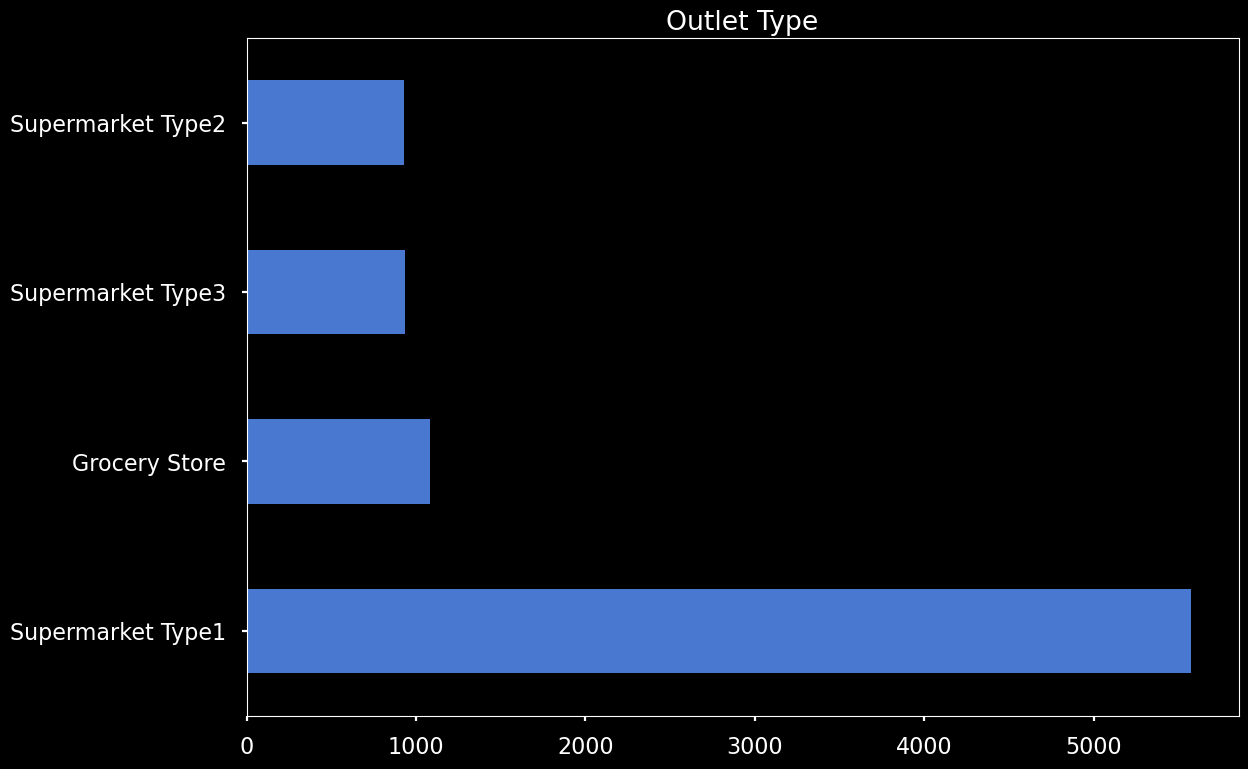

In [25]:
# generating a bar graph of outlet types
ax = df["Outlet_Type"].value_counts().plot(kind = "barh")
ax.set_title("Outlet Type")

Supermarket Type 1 is by far the most common outlet type.

Text(0.5, 1.0, 'Outlet Size')

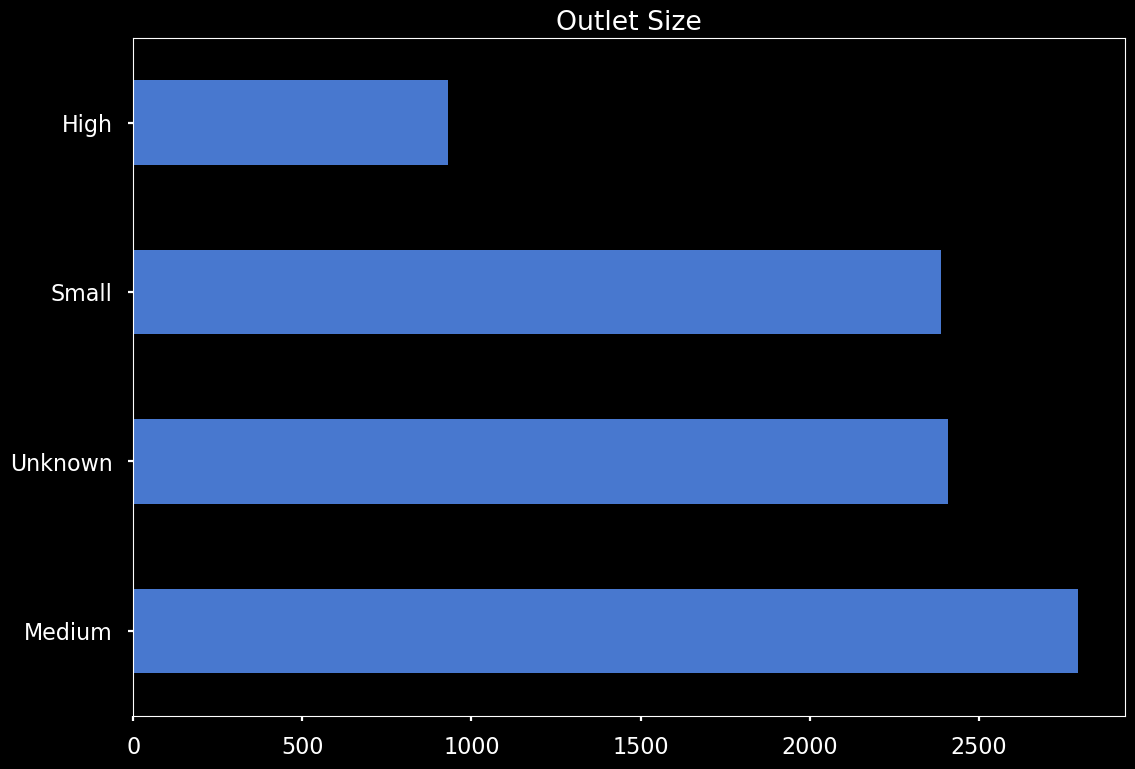

In [26]:
# generating a bar graph of Outlet_Size
ax = df["Outlet_Size"].value_counts().plot(kind = "barh")
ax.set_title("Outlet Size")

# Explanatory Data Analysis

One of the first areas of exploration will be the relationship between an item's fat content and outlet sales.

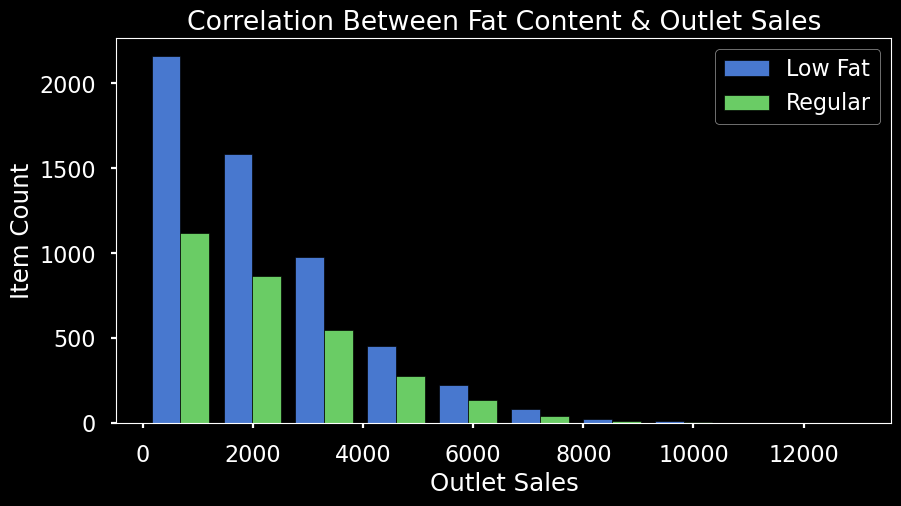

In [27]:
import matplotlib.patches as mpatches

# establishing fat content data frames
df_fat = df["Item_Fat_Content"] == "Low Fat"
df_reg = df["Item_Fat_Content"] == "Regular"

# gaining the outlet sales rates based on item fat content
rate_fat = df[df_fat]["Item_Outlet_Sales"]
rate_reg = df[df_reg]["Item_Outlet_Sales"]

# generating a histogram with both data frames plotted
fig, ax = plt.subplots(figsize=(10,5))
plt.hist([rate_fat, rate_reg], bins = 10, edgecolor = "black")
ax.set_title("Correlation Between Fat Content & Outlet Sales")
ax.set_xlabel("Outlet Sales")
ax.set_ylabel("Item Count")

#generating a legend for the graph
ax.legend(labels = ["Low Fat", "Regular"])

plt.show()

Text(0.5, 1.0, 'Sales By Item Fat Content')

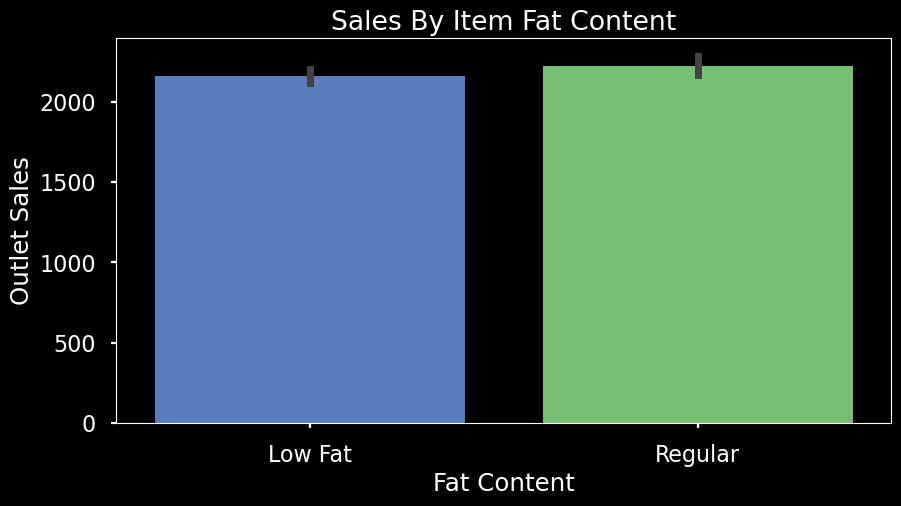

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)
ax.set_ylabel("Outlet Sales")
ax.set_xlabel("Fat Content")
ax.set_title("Sales By Item Fat Content")

Based on this graph, it is apparent that there are more low fat items than regular fat items in general. However, it seems that regular items have a tendancy to have higher outlet sales. Though, this looks to be only a slight difference.

Next, we will take a look at the distribution of Item_Visibility. As a reminder, the Item_Visibility column represents the percentage of display space taken up within the store.

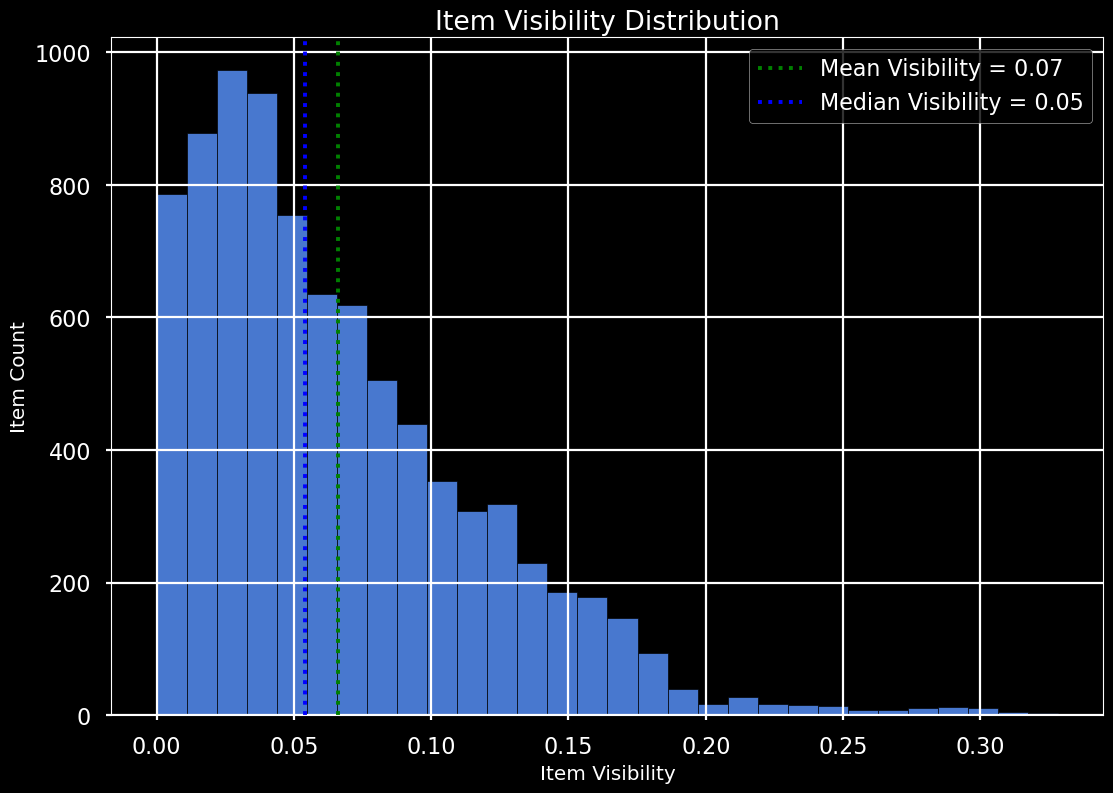

In [29]:
# generating a histogram of Item_Visibility
ax = df["Item_Visibility"].hist(bins = 30, edgecolor = "black")
ax.set_title("Item Visibility Distribution")
ax.set_xlabel("Item Visibility")
ax.set_ylabel("Item Count")

# acquiring the mean and average in order to place them onto a legend
mean_vis = df['Item_Visibility'].mean()
ax.axvline(mean_vis,color='green', ls=':',
           label=f"Mean Visibility = {mean_vis:,.2f}",);

med_vis = df['Item_Visibility'].median()
ax.axvline(med_vis,color='blue', ls=':',
           label=f"Median Visibility = {med_vis:,.2f}");


ax.set_xlabel(ax.xaxis.get_label().get_text(),
              fontsize='x-large')
ax.set_ylabel(ax.yaxis.get_label().get_text(),
              fontsize='x-large')
ax.legend();

This demonstrates that most items take up a very small percentage of allocated display space, which makes sense. Most items certainly trend below 10% of the store's total display space.

Text(0.5, 1.0, 'Item MSRP & Sales By Outlet Size')

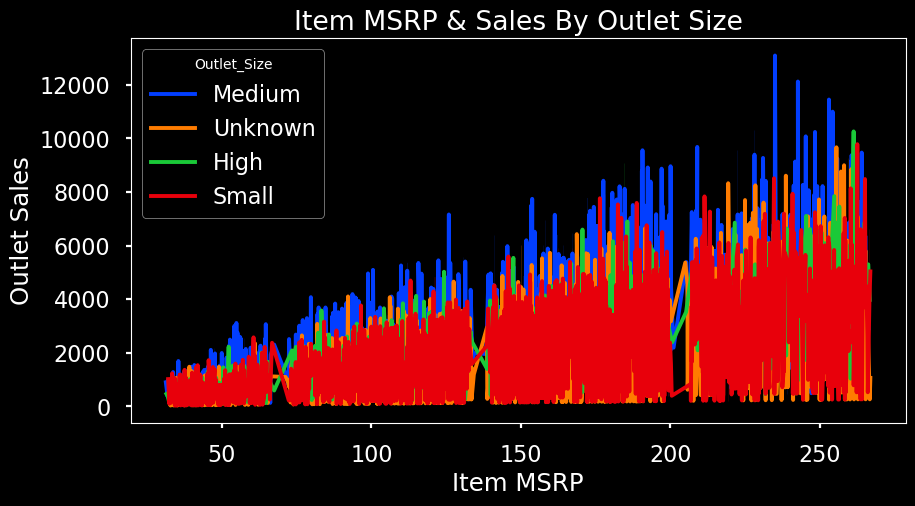

In [30]:
# creating a visualization in order to compare Item_MRP to Outlet_Sales by Outlet_Size
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(
    x="Item_MRP",
    y="Item_Outlet_Sales",
    data=df,
    palette='bright',
    hue='Outlet_Size');
ax.set_xlabel("Item MSRP")
ax.set_ylabel("Outlet Sales")
ax.set_title("Item MSRP & Sales By Outlet Size")

Outlet sales are generally the highest at medium sized outlets based on the above graph.

Text(0.5, 1.0, 'Item MSRP & Sales By Outlet Type')

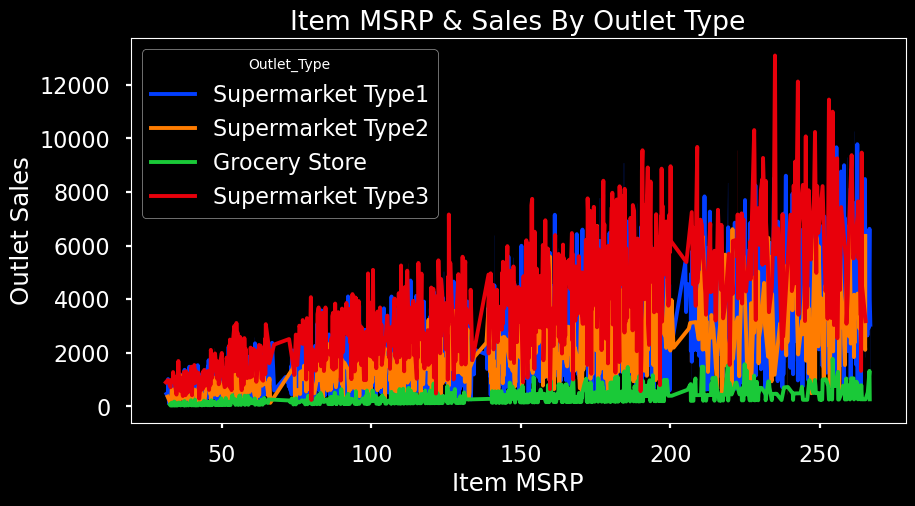

In [31]:
# creating a visualization in order to compare Item_MRP to Outlet_Sales by Outlet_Size
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(
    x="Item_MRP",
    y="Item_Outlet_Sales",
    data=df,
    palette='bright',
    hue='Outlet_Type');
ax.set_xlabel("Item MSRP")
ax.set_ylabel("Outlet Sales")
ax.set_title("Item MSRP & Sales By Outlet Type")

Based on the above graph, grocery stores have some of the highest outlet sales.

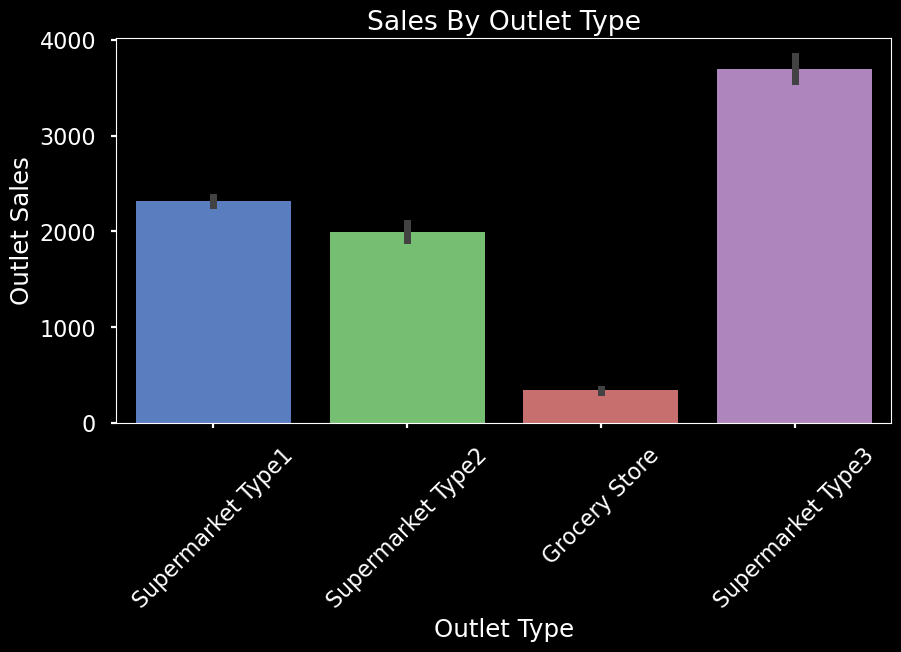

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)
ax.set_ylabel("Outlet Sales")
ax.set_xlabel("Outlet Type")
ax.set_title("Sales By Outlet Type")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

Text(0.5, 1.0, 'Sales By Outlet Size')

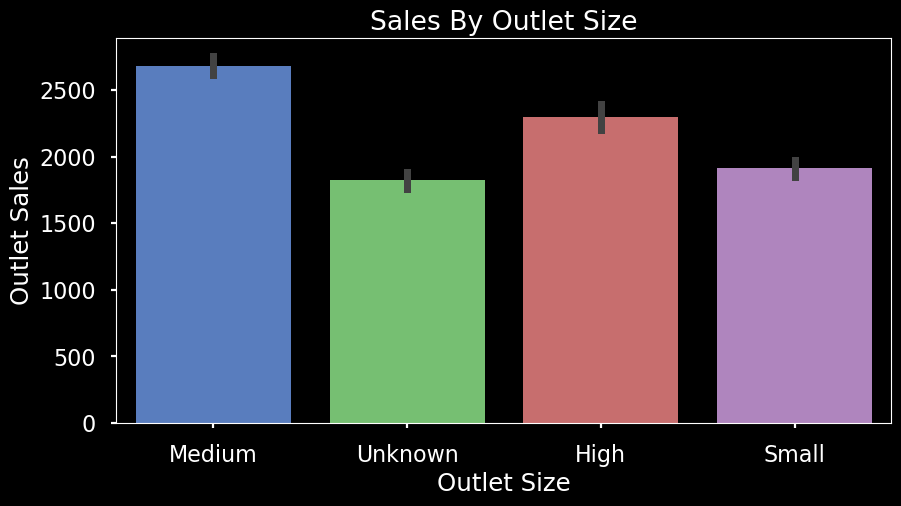

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)
ax.set_ylabel("Outlet Sales")
ax.set_xlabel("Outlet Size")
ax.set_title("Sales By Outlet Size")

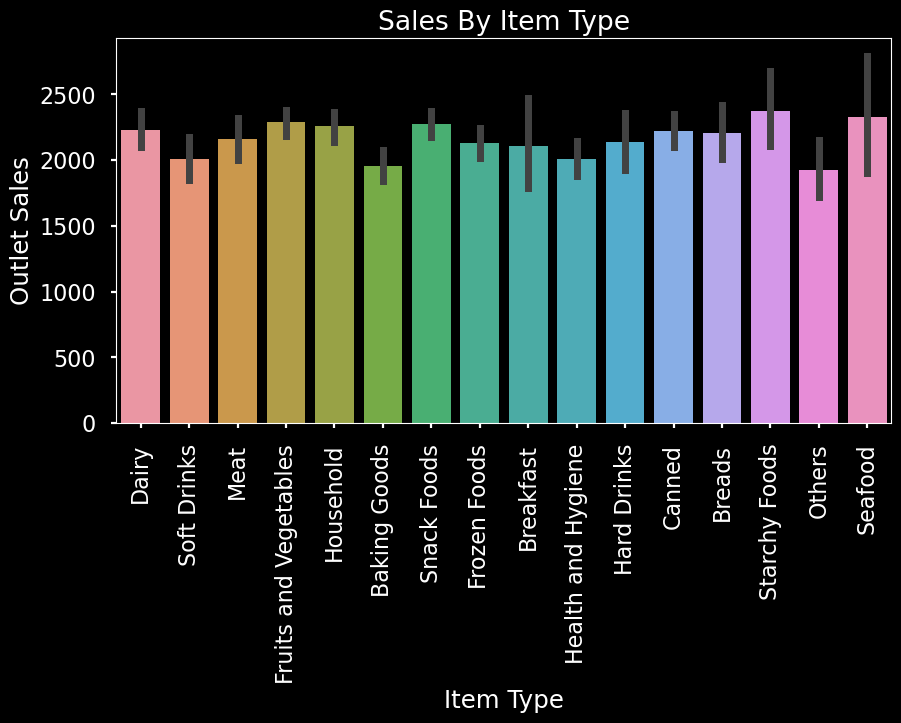

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=df)
ax.set_ylabel("Outlet Sales")
ax.set_xlabel("Item Type")
ax.set_title("Sales By Item Type")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

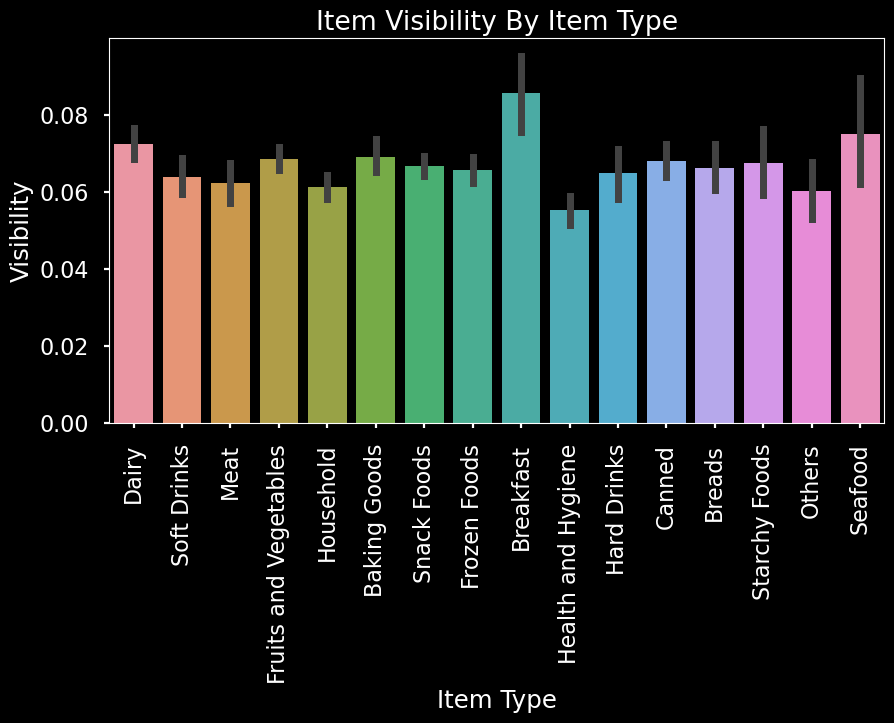

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='Item_Type',y='Item_Visibility',data=df)
ax.set_xlabel("Item Type")
ax.set_ylabel("Visibility")
ax.set_title("Item Visibility By Item Type")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

# Preprocessing data

The purpose of this next portion is to prepare the data for a machine learning algorithm and to prevent data leakage.

In [36]:
# checking to see if df2 has unedited data from the previous sections
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


This confirms that df2 is our original starting data frame before any data cleaning.

For the purposes of constructing a predictive model, the Item_Identifier column will be removed.

In [37]:
# removing the Item_Identifier column
df2.drop(columns = ["Item_Identifier"], inplace = True)

# Fixing Catagorical Data Inconsistencies

In [38]:
# checking each object column's unique entries
# adding spacing for ease of reading
print(df2["Item_Fat_Content"].unique())
print()
print(df2["Item_Type"].unique())
print()
print(df2["Outlet_Location_Type"].unique())
print()
print(df2["Outlet_Type"].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

['Tier 1' 'Tier 3' 'Tier 2']

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [39]:
# replacing LF with Low Fat
df2 = df2.replace(to_replace="LF",
           value="Low Fat")
# replacing low fat with Low Fat
df2 = df2.replace(to_replace="low fat",
           value="Low Fat")
# replacing reg with Regular
df2 = df2.replace(to_replace="reg",
           value="Regular")
# checking to make sure the values of Item_Fat_Content are correct
print(df2["Item_Fat_Content"].unique())

['Low Fat' 'Regular']


In [40]:
df2["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

# Data Split

Item_Outlet_Sales will be the target data set and will thus be our y value while every other necessary variable will be within the X data frame.

In [41]:
# performing data split
y = df2["Item_Outlet_Sales"]
X = df2.drop(columns = ["Item_Outlet_Sales"])

In [42]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

# Preprocessing Pipeline

In [43]:
# Instantiate the transformers
scaler = StandardScaler()
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
# Prepare separate processing pipelines for numeric and categorical data
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)
# Create ColumnSelectors for the the numeric and categorical data
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# Combine the Pipelines and ColumnSelectors into tuples for the ColumnTransformer
cat_tuple = (cat_pipe, cat_selector)
num_tuple = (num_pipe, num_selector)
# Create the preprocessing ColumnTransformer
preprocessor = make_column_transformer(cat_tuple, num_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001ED3B0E37F0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001ED3B0E3DC0>)])

In [44]:
# fitting column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
# removing "pipeline-1__" string segment from each element in the array and adding back the cleaned version
for i in feature_names:
    val = list(feature_names).index(i)
    x = i[12:]
    feature_names = np.delete(feature_names, val)
    feature_names = np.append(feature_names, x)
feature_names

array(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Typ

In [45]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head(3)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
8269,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,-1.319041,-0.043295,-1.268171,0.026015
7604,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-1.574485,0.248066,-0.459996,1.338206
2762,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-0.158360,-0.726880,0.182616,0.741756


In [46]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
8077,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.571480,-0.093503,-0.120626,1.099626
2391,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.183604,-0.421698,-0.204533,-0.093275
163,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.307269,0.090081,-0.412092,-0.093275


In [47]:
## confirm the first 3 rows index in y_test matches X_test_df
y_test.head(3)

8077    1696.4584
2391    2024.0320
163     2618.5914
Name: Item_Outlet_Sales, dtype: float64

# Linear Regression Model

In [48]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    # Training Data
    y_pred_train = model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [49]:
reg = LinearRegression()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.56	RMSE= 1245218.76
Test Data:	R^2= 0.56	RMSE= 1355418.98


<AxesSubplot: title={'center': 'Linear Regression Feature Importance'}>

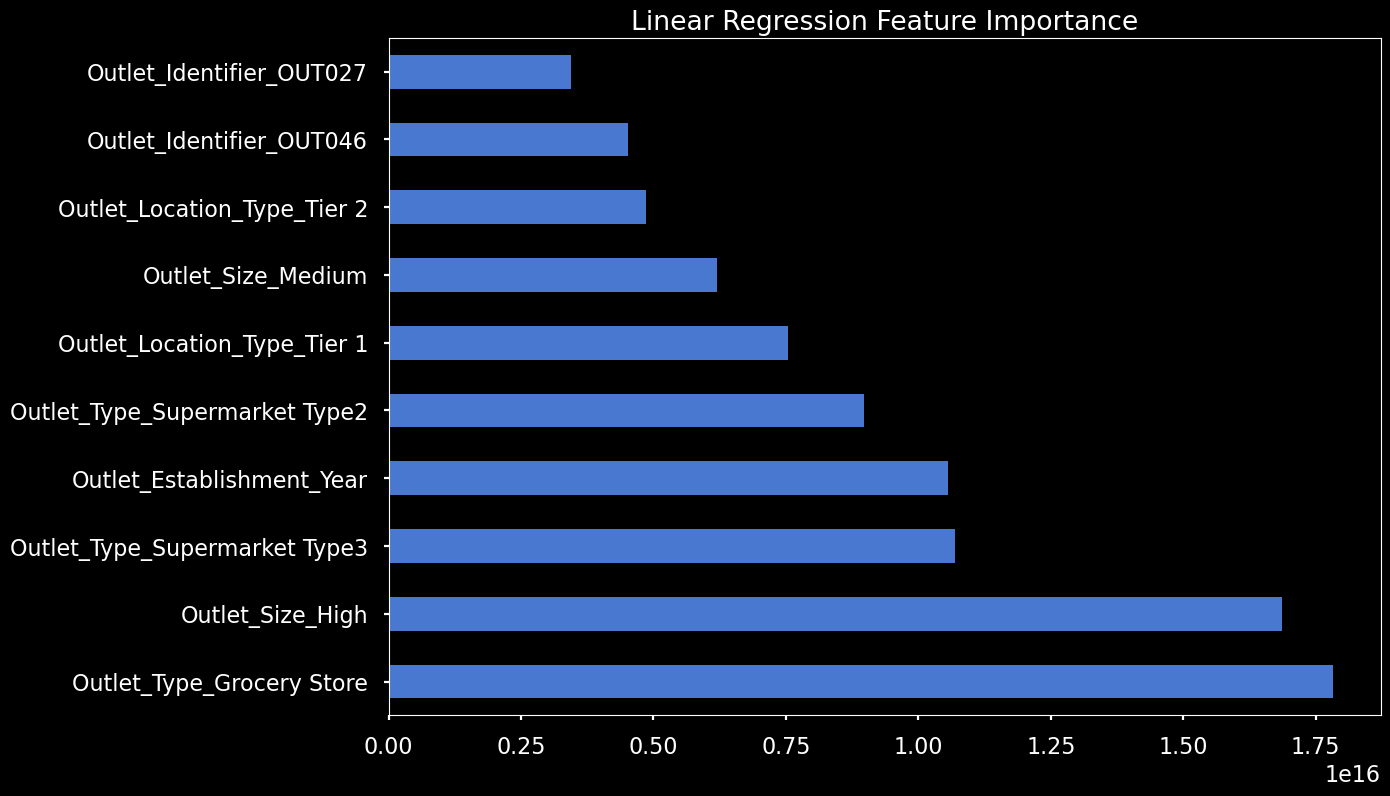

In [50]:
# Source: https://stackoverflow.com/questions/66750706/sklearn-important-features-error-when-using-logistic-regression
importance = reg.coef_[0:]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance, index = feature_names)
feat_importances.nlargest(10).plot(kind='barh',title = 'Linear Regression Feature Importance')

# Random Forest Model

In [51]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [52]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6), 
                          color_dict=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)
        
    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax

In [53]:
reg = RandomForestRegressor(random_state = SEED)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.94	RMSE= 180164.67
Test Data:	R^2= 0.56	RMSE= 1347722.85


In [54]:
reg.feature_importances_

array([4.80322246e-03, 4.99671848e-03, 4.57980936e-03, 2.97407273e-03,
       2.50310471e-03, 4.31213877e-03, 5.63274492e-03, 5.73448693e-03,
       8.40208680e-03, 2.95183883e-03, 4.30764670e-03, 6.33613632e-03,
       3.67456153e-03, 1.59168666e-03, 1.37351994e-03, 8.14786272e-03,
       4.17924297e-03, 3.02188271e-03, 9.53254019e-06, 1.47514288e-03,
       3.58453323e-03, 1.11449919e-03, 8.58920300e-06, 2.60832278e-02,
       3.66918064e-03, 5.19453402e-03, 3.01408192e-03, 4.24917691e-03,
       1.34432147e-03, 3.62632793e-03, 3.70140957e-03, 3.48916888e-03,
       3.25482881e-03, 2.72250856e-03, 1.96758190e-01, 2.14536360e-03,
       9.59292133e-04, 3.22763242e-02, 5.34874982e-02, 9.71458118e-02,
       4.44051354e-01, 2.71123398e-02])

In [55]:
## Checking the number of feature importances matches the # of columns
print(len(reg.feature_importances_))
print(len(X_train_df.columns))
len(reg.feature_importances_) == len(X_train_df.columns)

42
42


True

In [56]:
## Saving the feature importances
importances = pd.Series(reg.feature_importances_, index= feature_names,
                       name='Feature Importance')

In [57]:
# Saving the feature importances sorted from smallest to largest (ascending=True)
sorted_importance = importances.sort_values()

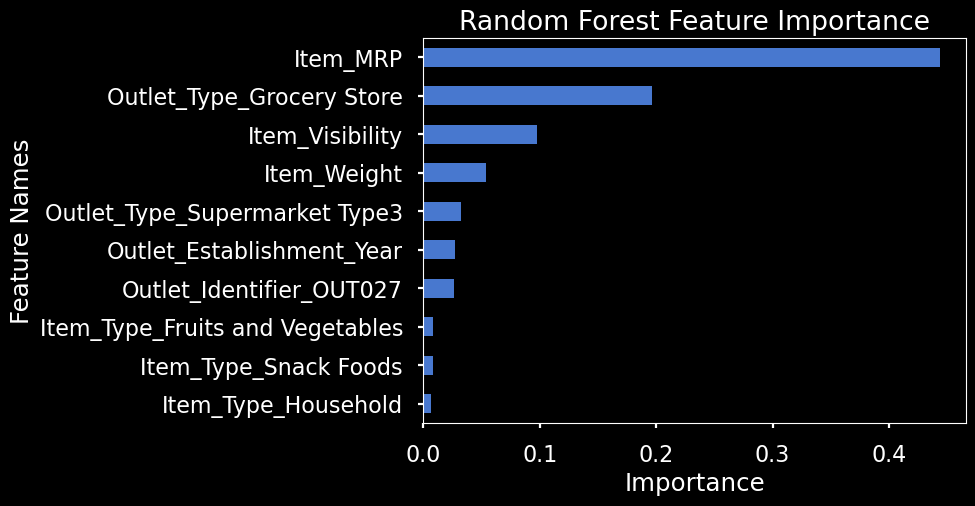

In [58]:
## plotting top 10 importances
ax = sorted_importance.tail(10).plot(kind='barh',
                                    figsize=(7,5),
                                      )
ax.set(xlabel='Importance',
        ylabel='Feature Names',
        title='Random Forest Feature Importance');

# Saving The Random Forest Model

In [59]:
# creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'RandomForest':reg}
#joblib.dump(export, 'random_forest_l01.joblib')

I'm going to check just to make sure everything saved successfully.

In [60]:
loaded = joblib.load('random_forest_l01.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForest'])

In [61]:
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
loaded_model = loaded['RandomForest']

Training Data:	R^2= 0.94	RMSE= 180164.67
Test Data:	R^2= 0.56	RMSE= 1347722.85


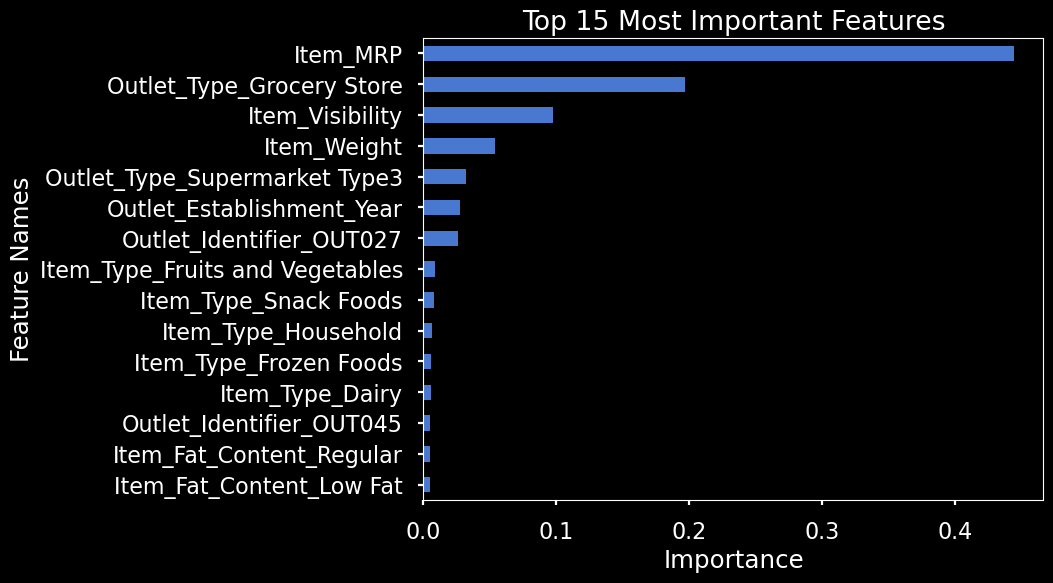

In [62]:
evaluate_regression(loaded_model,X_train_df, y_train, X_test_df,y_test)
loaded_importances = get_importances(loaded_model)
plot_importance_color(loaded_importances,top_n=15,color_dict=None);